# Import Libraries

In [72]:
# RUN THIS CELL
import pandas as pd
import numpy as np
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots
from pmdarima import auto_arima                              # for determining ARIMA orders

# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")


In [85]:
import matplotlib.pyplot as plt

# Getting Data

In [73]:
df = pd.read_csv('oregon_rider_data.csv', index_col ='Month', parse_dates = True)

In [74]:
df.index.freq = 'MS'

In [75]:
print(df.head())

            Avg_monthly_ride
Month                       
1960-01-01               648
1960-02-01               646
1960-03-01               639
1960-04-01               654
1960-05-01               630


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 114 entries, 1960-01-01 to 1969-06-01
Freq: MS
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Avg_monthly_ride  114 non-null    int64
dtypes: int64(1)
memory usage: 1.8 KB


In [77]:
df.describe()

,Avg_monthly_ride
count,114.000000
mean,1120.543860
std,270.888317
min,613.000000
25%,885.000000
50%,1158.000000
75%,1340.000000
max,1558.000000


In [79]:
df.head()

,Avg_monthly_ride
Month,
1960-01-01,648
1960-02-01,646
1960-03-01,639
1960-04-01,654
1960-05-01,630


In [80]:
df['Avg_monthly_ride'].unique()

array([ 648,  646,  639,  654,  630,  622,  617,  613,  661,  695,  690,
        707,  817,  839,  810,  789,  760,  724,  704,  691,  745,  803,
        780,  761,  857,  907,  873,  910,  900,  880,  867,  854,  928,
       1064, 1103, 1026, 1102, 1080, 1034, 1083, 1078, 1020,  984,  952,
       1033, 1114, 1160, 1058, 1209, 1200, 1130, 1182, 1152, 1116, 1098,
       1044, 1142, 1222, 1234, 1155, 1286, 1281, 1224, 1280, 1228, 1181,
       1156, 1124, 1205, 1260, 1188, 1212, 1269, 1246, 1299, 1284, 1345,
       1341, 1308, 1448, 1454, 1467, 1431, 1510, 1558, 1536, 1523, 1492,
       1437, 1365, 1310, 1441, 1450, 1424, 1360, 1429, 1440, 1414, 1408,
       1337, 1258, 1214, 1326, 1417, 1329, 1461, 1425, 1419, 1432, 1394,
       1327], dtype=int64)

# Plot the source data

[Text(0, 0.5, 'Hundred of people')]

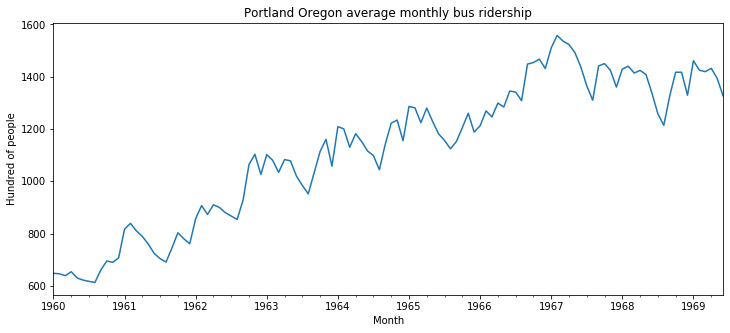

In [82]:
title = 'Portland Oregon average monthly bus ridership'
y_label = 'Hundred of people'

ax= df['Avg_monthly_ride'].plot(figsize = (12,5), title = title)
ax.autoscale(axis='x', tight=True)
ax.set(ylabel = y_label)

# Run ETS Decompostion

<Figure size 720x360 with 0 Axes>

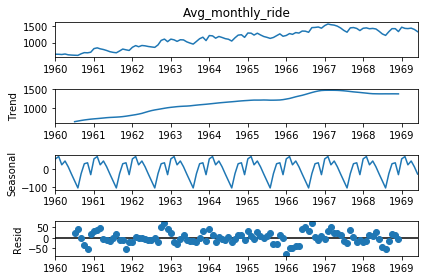

In [86]:
plt.figure(figsize=(10,5))
result = seasonal_decompose(df['Avg_monthly_ride'], model ='add')
result.plot();

# Run PMDARIMA.auto_arima to obtain recommended orders

In [87]:
auto_arima(df['Avg_monthly_ride'], seasonal=True, m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  114
Model:             SARIMAX(0, 1, 0)x(2, 0, 0, 12)   Log Likelihood                -569.868
Date:                            Thu, 09 Jul 2020   AIC                           1147.735
Time:                                    21:07:42   BIC                           1158.645
Sample:                                         0   HQIC                          1152.162
                                            - 114                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.0208      3.343      0.305      0.760      -5.531       7.572
ar.S.L12       0.6308      0.086      7.335      0.000       0.462       0.799
ar.S.L24       0.1794      0.084      2.137      0.033       0.015       0.344
sigma2      1270.6507    153.658      8.269      0.000     969.486    1571.815
===================================================================================
Ljung-Box (Q):                       27.92   Jarque-Bera (JB):                 7.78
Prob(Q):                              0.93   Prob(JB):                         0.02
Heteroskedasticity (H):               1.85   Skew:                             0.48
Prob(H) (two-sided):                  0.06   Kurtosis:                         3.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Train and Test Data

In [88]:
train = df.iloc[:len(df)-12]
test = df.iloc[len(df)-12:]

In [90]:
train.shape

(102, 1)

In [91]:
test.shape

(12, 1)

# Fit SARIMAX(0, 1, 0)x(2, 0, 0, 12) model to the training set

In [92]:
model = SARIMAX(train['Avg_monthly_ride'], order = (0,1,0), seasonal_order= (2,0,0,12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                   Avg_monthly_ride   No. Observations:                  102
Model:             SARIMAX(0, 1, 0)x(2, 0, 0, 12)   Log Likelihood                -508.367
Date:                            Thu, 09 Jul 2020   AIC                           1022.734
Time:                                    21:10:36   BIC                           1030.580
Sample:                                01-01-1960   HQIC                          1025.910
                                     - 06-01-1968                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.5940      0.083      7.115      0.000       0.430       0.758
ar.S.L24       0.1975      0.083      2.385      0.017       0.035       0.360
sigma2      1243.9603    153.152      8.122      0.000     943.788    1544.132
===================================================================================
Ljung-Box (Q):                       29.43   Jarque-Bera (JB):                 6.30
Prob(Q):                              0.89   Prob(JB):                         0.04
Heteroskedasticity (H):               2.10   Skew:                             0.43
Prob(H) (two-sided):                  0.03   Kurtosis:                         3.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Prediction

In [93]:
start = len(train)
end = len(train) + len(test)-1
predictions = results.predict(start = start, end= end, dynamic = False, typ ='levels').rename('SARIMAX(0, 1, 0)x(2, 0, 0, 12) Predictions')

# Plot prediction against known values

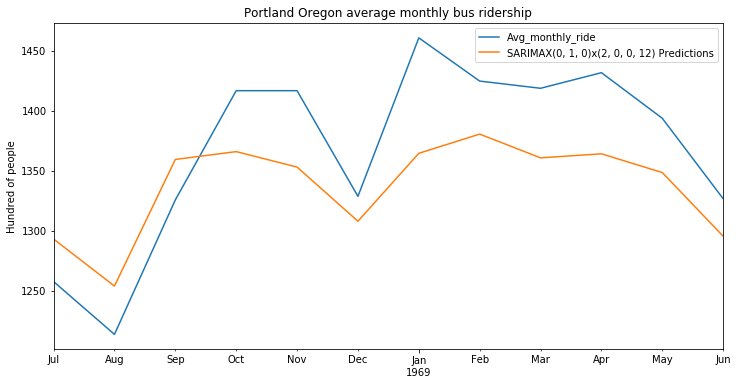

In [96]:
title = 'Portland Oregon average monthly bus ridership'
ylabel = 'Hundred of people'
xlabel = ''

ax = test['Avg_monthly_ride'].plot(legend = True, figsize = (12,6), title = title)
predictions.plot(legend=True)
ax.autoscale(axis='x', tight = True)
ax.set(xlabel = xlabel, ylabel=ylabel);

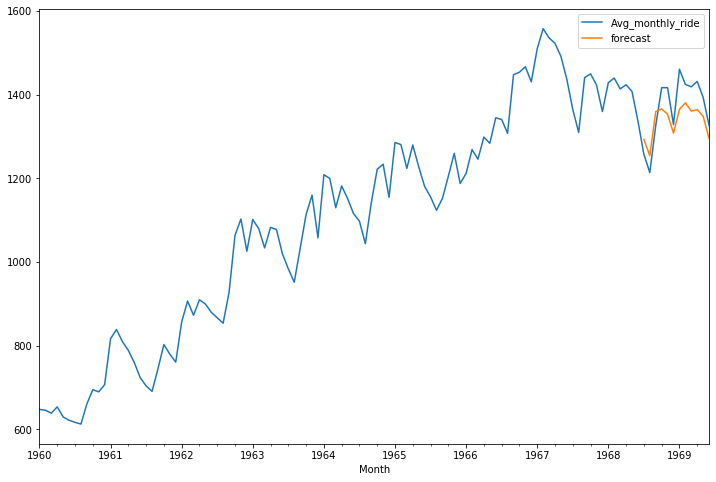

In [97]:
df['forecast'] = results.predict(start = start, end= end, dynamic= True)  
df[['Avg_monthly_ride', 'forecast']].plot(figsize=(12, 8))
plt.show()

In [99]:
import statsmodels.api as sm

In [102]:
mod = sm.tsa.SARIMAX(df['Avg_monthly_ride'], trend='n', order=(0,1,0), seasonal_order=(1,1,1,12))
results = mod.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                     Avg_monthly_ride   No. Observations:                  114
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -501.340
Date:                              Thu, 09 Jul 2020   AIC                           1008.680
Time:                                      21:34:48   BIC                           1016.526
Sample:                                  01-01-1960   HQIC                          1011.856
                                       - 06-01-1969                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.3236      0.186      1.739      0.082      -0.041       0.688
ma.S.L12      -0.9990     42.365     -0.024      0.981     -84.033      82.035
sigma2       984.8149   4.16e+04      0.024      0.981   -8.05e+04    8.25e+04
===================================================================================
Ljung-Box (Q):                       36.56   Jarque-Bera (JB):                 4.81
Prob(Q):                              0.63   Prob(JB):                         0.09
Heteroskedasticity (H):               1.48   Skew:                             0.38
Prob(H) (two-sided):                  0.26   Kurtosis:                         3.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

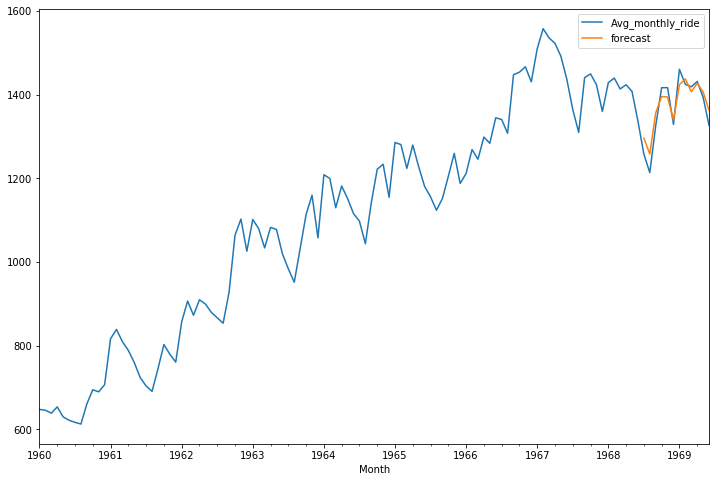

In [103]:
df['forecast'] = results.predict(start = start, end= end, dynamic= True)  
df[['Avg_monthly_ride', 'forecast']].plot(figsize=(12, 8))
plt.show()

In [106]:
forecast = results.predict(start = start, end= end, dynamic = False, typ ='levels').rename('SARIMAX(0, 1, 0)x(1, 1, [1], 12) Predictions')

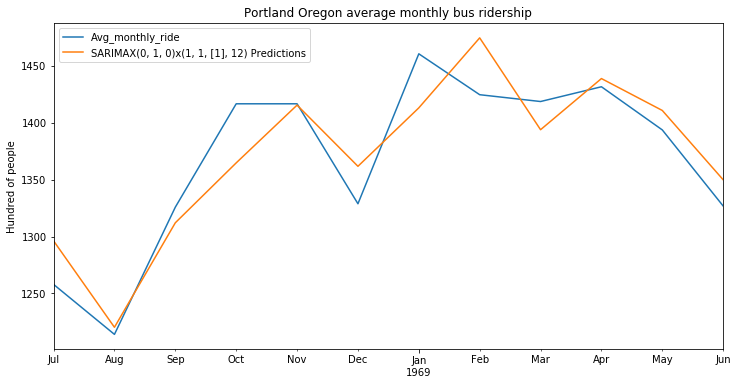

In [107]:
title = 'Portland Oregon average monthly bus ridership'
ylabel = 'Hundred of people'
xlabel = ''

ax = test['Avg_monthly_ride'].plot(legend = True, figsize = (12,6), title = title)
forecast.plot(legend=True)
ax.autoscale(axis='x', tight = True)
ax.set(xlabel = xlabel, ylabel=ylabel);

# Evaluate the model using MSE and RMSE

In [118]:
error1 = mean_squared_error(test['Avg_monthly_ride'], predictions)
error2 = rmse(test['Avg_monthly_ride'], predictions)
print(f'SARIMA(0,1,0)(1,1,1,12) MSE Error: {error1:11.6}')
print(f'SARIMA(0,1,0)(1,1,1,12) RMSE Error: {error2:11.4}')

SARIMA(0,1,0)(1,1,1,12) MSE Error:     2767.64
SARIMA(0,1,0)(1,1,1,12) RMSE Error:       52.61


In [113]:
test['Avg_monthly_ride'].mean()

1368.25

# Choose the second model - ARIMA(0,1,0)(1,1,1,12)

In [119]:
error1 = mean_squared_error(test['Avg_monthly_ride'], forecast)
error2 = rmse(test['Avg_monthly_ride'], forecast)
print(f'SARIMA(0,1,0)(1,1,1,12) MSE Error: {error1:11.5}')
print(f'SARIMA(0,1,0)(1,1,1,12) RMSE Error: {error2:11.4}')

SARIMA(0,1,0)(1,1,1,12) MSE Error:      979.77
SARIMA(0,1,0)(1,1,1,12) RMSE Error:        31.3


# Re-train the model with the full data and forecast one year into the future

In [120]:
model = SARIMAX(df['Avg_monthly_ride'], trend='n', order=(0,1,0), seasonal_order=(1,1,1,12))
results = mod.fit()
fcast = results.predict(len(df), len(df)+11, typ = 'levels').rename('SARMA(0,1,0)(1,1,1,12) Forecast')

# Plot the forecasted values alongside the original data

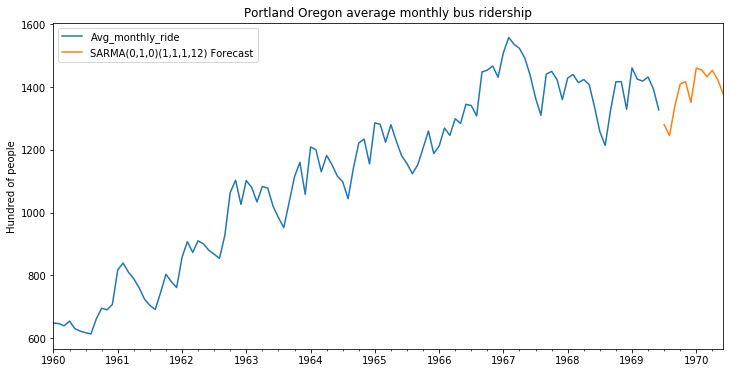

In [121]:
title = 'Portland Oregon average monthly bus ridership'
ylabel = 'Hundred of people'
xlabel=''

ax = df['Avg_monthly_ride'].plot(legend=True,figsize=(12,6),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [122]:
df.tail()

,Avg_monthly_ride,forecast
Month,,
1969-02-01,1425,1438.088824
1969-03-01,1419,1407.274324
1969-04-01,1432,1427.488426
1969-05-01,1394,1406.611424
1969-06-01,1327,1362.727769
